In [42]:
#### Import necessary modules and load data set###
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

wine = datasets.load_wine()
X_original=wine.data
scaler = StandardScaler().fit(X_original)
X = scaler.transform(X_original)
y=wine.target

In [43]:
## First try testing a model using holdout method

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y) 
#Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable

n_neighbors = 12

# build KNN model and choose n_neighbors based on cross-validation
knn = KNeighborsClassifier(n_neighbors)

# train the model on training set
knn.fit(X_train, y_train)

# test the model on test set
y_pred = knn.predict(X_test)


# print the score
print('Holdout accuracy: ', knn.score(X_test, y_test))

print('Classification report: ')
print(classification_report(y_test, y_pred))
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

Holdout accuracy:  0.9629629629629629
Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Confusion matrix: 
[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


In [44]:
## Second try testing a model using cross-validation with stratification 

#build new model
knn_cv = KNeighborsClassifier(n_neighbors)

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# X,y will automatically devided by 5 folder, using accuracy as scoring. 
#train new model with cv of 5, training on entire set X,y
scores = cross_val_score(knn_cv, X, y, cv=skf, scoring='accuracy')
predictions = cross_val_predict(knn_cv, X, y, cv=skf)

# print all 5 times scores 
print('All scores:')
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print('Cross-Validated accuracy: ', scores.mean())
print('\n')
print('Classification report: ')
print(classification_report(y, predictions))
print('Confusion report: ')
print(confusion_matrix(y, predictions))

All scores:
[0.91666667 0.97222222 1.         0.97142857 0.97142857]
Cross-Validated accuracy:  0.9663492063492063


Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        59
           1       1.00      0.92      0.96        71
           2       0.96      1.00      0.98        48

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

Confusion report: 
[[59  0  0]
 [ 4 65  2]
 [ 0  0 48]]


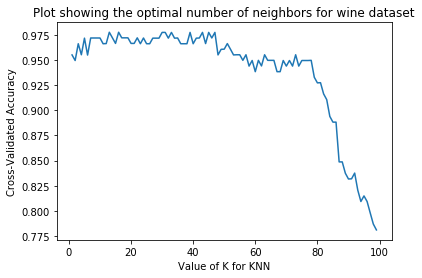

Maximal accuracy:  0.9776190476190475
Optimal number of neighbours:  13


In [45]:
## Test for optimal number of neigbours, based on cross-validated accuracy

%matplotlib inline
# choose k between 1 to 30
k_range = range(1, 100)
k_scores = []
ks = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X, y, cv=skf, scoring='accuracy')
    k_scores.append(scores.mean())
    ks.append(k)
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Plot showing the optimal number of neighbors for wine dataset')
plt.show()


print('Maximal accuracy: ', max(k_scores)) ##Same as above
print('Optimal number of neighbours: ', k_scores.index(max(k_scores))+1)


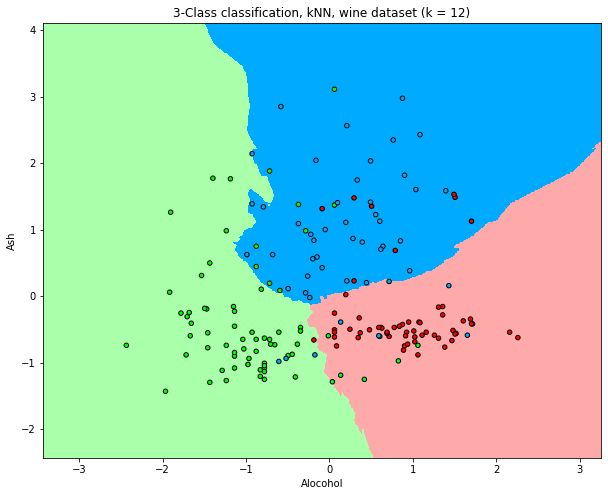

In [46]:
## Plot the decision boundaries for the first two features

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# build model and train the model
#knn = KNeighborsClassifier(n_neighbors, weights = 'distance')
#knn.fit(X_train, y_train)
h = .01  # step size in the mesh

# calculate min, max and limits (x_min=length, y_min=width)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# build model with only two features to plot
knn_2d = KNeighborsClassifier(n_neighbors)
knn_2d.fit(X_train[:, :2], y_train)

# get the predict values
y_pred_2d = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred_2d = y_pred_2d.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))

plt.pcolormesh(xx, yy, y_pred_2d, cmap=cmap_light)

#Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alocohol')
plt.ylabel('Ash')
plt.title("3-Class classification, kNN, wine dataset (k = %i)" % (n_neighbors))
plt.show()

Text(0, 0.5, 'Feature characteristic')

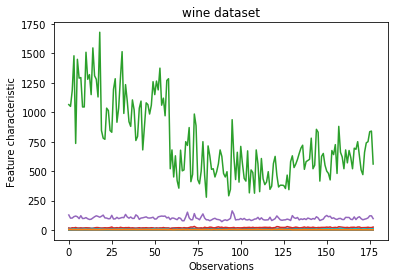

In [37]:
dataframe=pd.DataFrame({
    'one':wine.data[:,0],
     'two':wine.data[:,1],
    'three':wine.data[:,2],
    'four':wine.data[:,3],
    'five':wine.data[:,4],
    'six':wine.data[:,5],
    'seven':wine.data[:,6],
    'eigth':wine.data[:,7],
    'nine':wine.data[:,8],
    'ten':wine.data[:,9],
    'eleven':wine.data[:,10],
    'twelve':wine.data[:,11],
    'thirteen':wine.data[:,12],
    'classes':wine.target 
})

fig, ax = plt.subplots()
x_data=range(0,178)
ax.plot(x_data, dataframe['one'])
ax.plot(x_data, dataframe['two'])
ax.plot(x_data, dataframe['three'])
ax.plot(x_data, dataframe['four'])
ax.plot(x_data, dataframe['five'])
ax.plot(x_data, dataframe['six'])
ax.plot(x_data, dataframe['seven'])
ax.plot(x_data, dataframe['eigth'])
ax.plot(x_data, dataframe['nine'])
ax.plot(x_data, dataframe['ten'])
ax.plot(x_data, dataframe['eleven'])
ax.plot(x_data, dataframe['twelve'])
ax.plot(x_data, dataframe['thirteen'])

# set a title and labels
ax.set_title('wine dataset')
ax.set_xlabel('Observations')
ax.set_ylabel('Feature characteristic')